In [1]:
import matplotlib as mpl
import pylab as PP
import xarray as xr
import numpy as np
import geopandas
import GHCNDAverager
import os
os.environ["CARTOPY_USER_BACKGROUNDS"] = os.path.join(os.environ['HOME'], "cartopy_backgrounds/")
mpl.style.use('seaborn-poster')

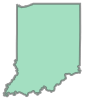

In [2]:
""" Get a shapefile for Indiana"""
states_gpd = geopandas.read_file("zip:///N/project/obrienta_startup/datasets/shapefiles/us_states/s_11au16.zip")

indiana_shapefile = states_gpd.query("STATE == 'IN'")['geometry'].values[0]
indiana_shapefile

In [3]:
""" Get precip data from the stations within Indiana"""
in_station_precip = GHCNDAverager.GHCNDStationsInShape(indiana_shapefile)
in_station_tmin = GHCNDAverager.GHCNDStationsInShape(indiana_shapefile, variable = 'TMIN')
in_station_tmax = GHCNDAverager.GHCNDStationsInShape(indiana_shapefile, variable = 'TMAX')

in_ghcn = xr.merge([in_station_precip, in_station_tmin, in_station_tmax], join = 'outer')

/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
in_ghcn

<xarray.Dataset>
Dimensions:     (station: 1735, time: 62628)
Coordinates:
  * station     (station) int64 0 1 2 3 4 5 6 ... 1729 1730 1731 1732 1733 1734
  * time        (time) object 1850-01-01 00:00:00 ... 2021-06-20 00:00:00
Data variables:
    PRCP        (station, time) float64 nan nan nan nan nan ... 0.0 6.6 13.5 nan
    station_id  (station) <U11 'US1INAD0001' 'US1INAD0007' ... 'USW00094895'
    elevation   (station) float64 264.0 250.2 248.1 260.0 ... 175.3 250.9 285.6
    lat         (station) float64 40.65 40.75 41.12 41.19 ... 39.45 40.65 40.23
    lon         (station) float64 -84.97 -84.94 -85.09 ... -87.3 -86.15 -85.39
    name        (station) object 'BERNE 0.8 WSW' ... 'MUNCIE DELAWARE CO AP'
    state       (station) object 'IN' 'IN' 'IN' 'IN' ... 'IN' 'IN' 'IN' 'IN'
    TMIN        (station, time) float64 nan nan nan nan ... 14.4 22.2 21.1 nan
    TMAX        (station, time) float64 nan nan nan nan ... 31.1 33.3 28.3 nan
Attributes:
    ghcnd_version_info:  The current version of GHCN Daily is 3.28-upd-202106...

In [5]:
""" Write the file to disk."""

encoding_dict = dict(\
                     time = dict(dtype = 'float', _FillValue = None),
                     station = dict(dtype = 'int32'),
                     PRCP = dict(dtype = 'int16', scale_factor = 0.1, zlib = True, complevel = 4, _FillValue = -9999),
                     TMIN = dict(dtype = 'int16', scale_factor = 0.1, zlib = True, complevel = 4, _FillValue = -9999),
                     TMAX = dict(dtype = 'int16', scale_factor = 0.1, zlib = True, complevel = 4, _FillValue = -9999),
                     )
                     
in_ghcn.to_netcdf("IN_GHCN_21Jun2021.nc",
                  encoding = encoding_dict
                 )